# Three based methods

In [83]:
import os

dir = str(os.getcwd())
split_dir = dir.split('\\')

# Set the github repository directory
for folder in reversed(split_dir):
    if folder != 'AA_Project_G6' and 'AA_Project_G6' in split_dir:
        os.chdir(os.path.dirname(os.getcwd()))
    else:
        break

print('Current directory:', os.getcwd())

Current directory: C:\Users\alvar\OneDrive\IST\4º Ano\1º semestre\Automação Avançada\AA_Project_G6


In [84]:
import pandas as pd
import numpy as np

# Import data from .csv file
df = pd.read_csv(filepath_or_buffer='./data/raw/credit_card_churn.csv', delimiter=',')

#df.info()

df.isna().sum()

# Drop rows with the same client ID
df.drop_duplicates(subset='CLIENTNUM')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [85]:
# Drop CLIENTNUM and Naive Bayes related columns
df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
       axis=1, inplace=True)


# Classify the types of features in the dataframe
cat_feats = []
num_feats = []
for feat in df.columns:
    if feat == 'Attrition_Flag':
        None
    else:
        if df[feat].dtype == 'O':
            cat_feats.append(feat)
        else:
            num_feats.append(feat)

#print('There are {} categorical features: {}'.format(len(cat_feats), cat_feats))
#print('There are {} numerical features: {}'.format(len(num_feats), num_feats))

# Encode the categorical columns
dummies = pd.get_dummies(df[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']], drop_first=True)

# Merge encoded columns with original dataframe
df2 = df.join(dummies)

# Drop categorical columns
df2 = df2.drop(columns=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

df2


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,0,1,0,0,0,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,1,0,0,0,0,1,0,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,0,1,0,0,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,1,0,0,0,1,0,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,1,0,1,0,0,0,0,0,0,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,0,0,1,0,0,0,0,0,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0,0,0,0,0,1,0,0,0,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,0,1,1,0,0,0,0,0,0,0


In [157]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, auc, roc_curve, accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [158]:
#Dataset division: the output y (Attrition_Flag_Existing Customer) and the input X (all variables except Attrition_Flag_Existing Customer)
X = df2.drop(['Attrition_Flag_Existing Customer'], axis=1)
y = df2['Attrition_Flag_Existing Customer']

#Divide the data into train and test with a train size of 70%
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = seed)

#Print train accuracy
print('Train accuracy: {:.6f}'.format(clf_dt.score(X_train, y_train)))

Train accuracy: 0.930023


### Classification Trees

In [159]:
#Define function for fitting the model and printing the performance indicators and confusion matrices for various depths
def classificationtree(depth):
    #Model fit
    clf_dt = DecisionTreeClassifier(max_depth=depth)
    clf_dt.fit(X_train, y_train)

    #Print Performance indicators
    print("Performance indicators:")
    y_pred = clf_dt.predict(X_test)
    print("Accuracy: {:.2f}%\n".format(accuracy_score(y_test, y_pred)*100))

    #Print confusion matrix
    print("Confusion matrix:\n")
    cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=['Predicted attrited customers', 'Preticted existing costumers'], columns=['Actual Attrited', 'Actual Existing '])
    print(cm)
    
    return clf_dt

In [160]:
#Define function for graphic representation of the tree for various depths
def treegraph(depth):
    export_graphviz(clf_dt, 
                    out_file = "existing_costumer_tree_depth" + str(depth) + ".dot", 
                    feature_names = X_train.columns)

    with open("existing_costumer_tree_depth" + str(depth) + ".dot") as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [161]:
#Define function for ploting the feature importance attribute of the Classification Tree
def importanceplot():
    importance = pd.DataFrame({'Importance':clf_dt.feature_importances_*100}, 
                                  index = X.columns)

    return importance.sort_values(by = 'Importance', 
                               axis = 0, 
                               ascending = True).plot(kind = 'barh', 
                                                      color = 'red', )

    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None

Depth = 2

Performance indicators:
Accuracy: 89.04%

Confusion matrix:

                              Actual Attrited  Actual Existing 
Predicted attrited customers              223               100
Preticted existing costumers              233              2483


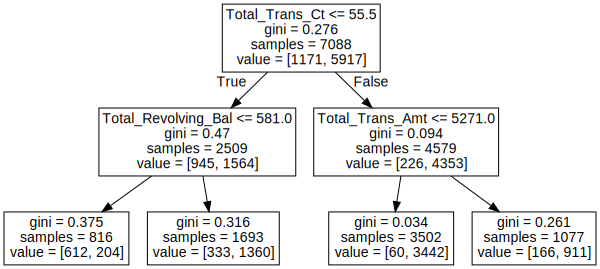

In [173]:
clf_dt = classificationtree(2)
treegraph(2)

<AxesSubplot: >

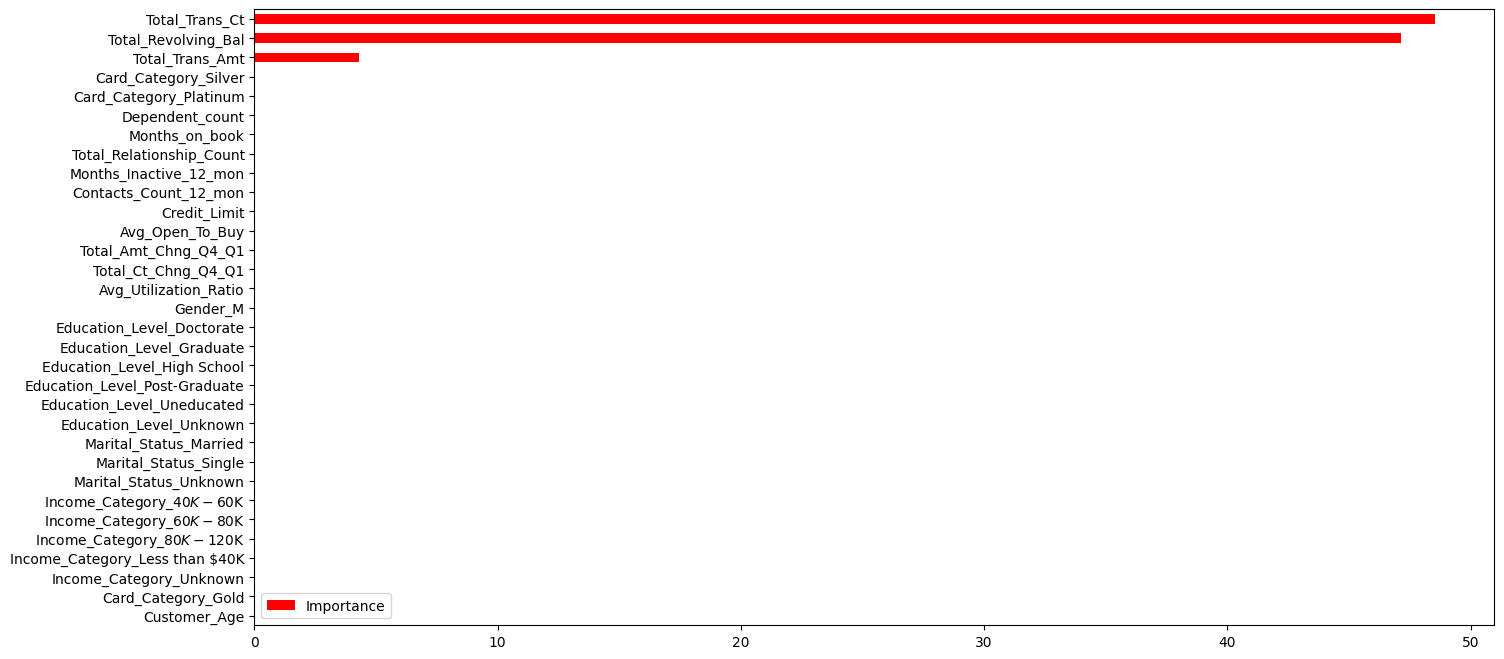

In [174]:
importanceplot()

Depth = 4

Performance indicators:
Accuracy: 91.81%

Confusion matrix:

                              Actual Attrited  Actual Existing 
Predicted attrited customers              284                77
Preticted existing costumers              172              2506


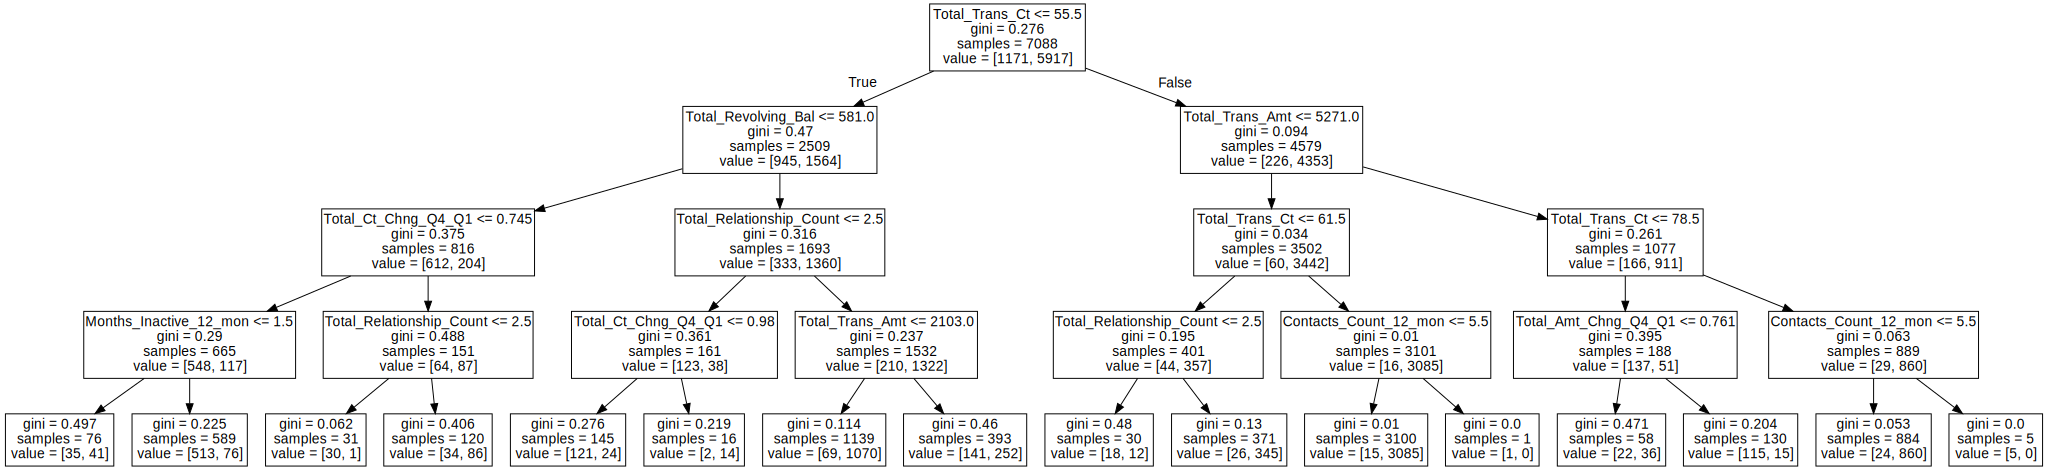

In [175]:
clf_dt = classificationtree(4)
treegraph(4)

<AxesSubplot: >

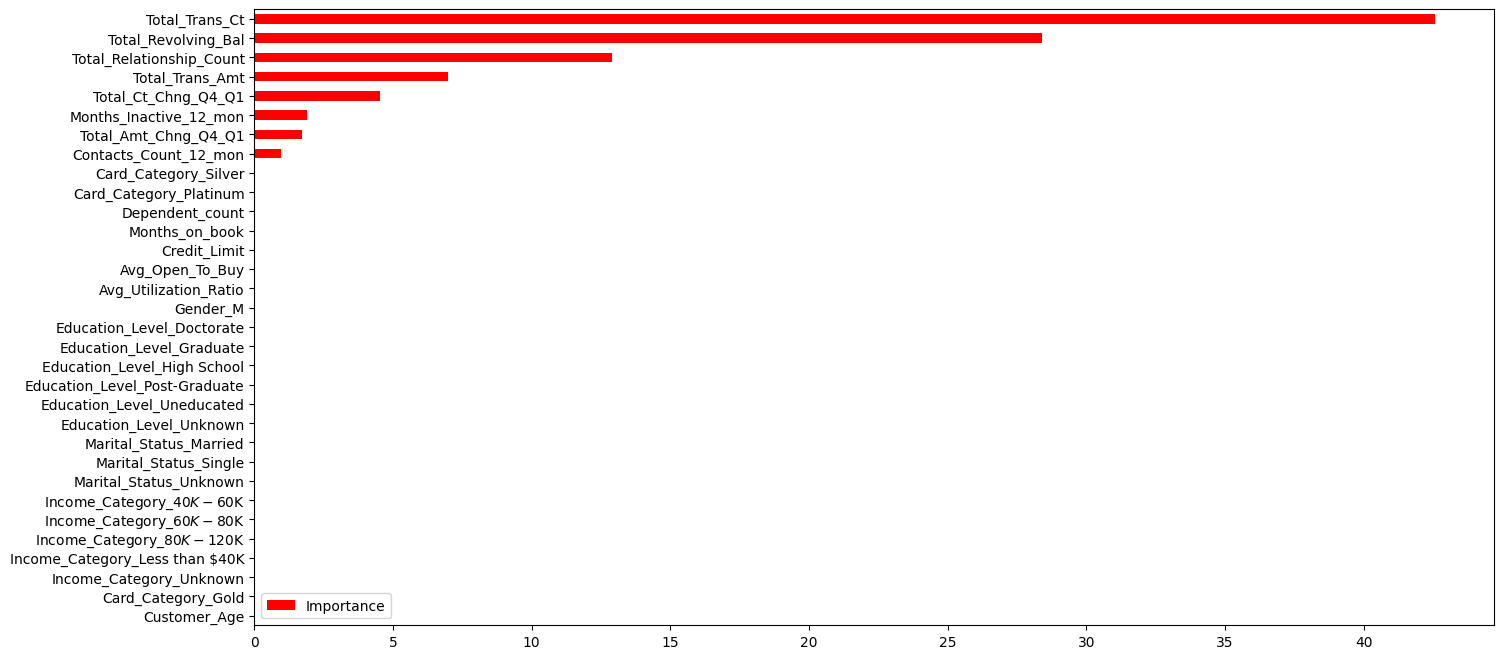

In [176]:
importanceplot()

Depth = 6

Performance indicators:
Accuracy: 93.95%

Confusion matrix:

                              Actual Attrited  Actual Existing 
Predicted attrited customers              355                83
Preticted existing costumers              101              2500


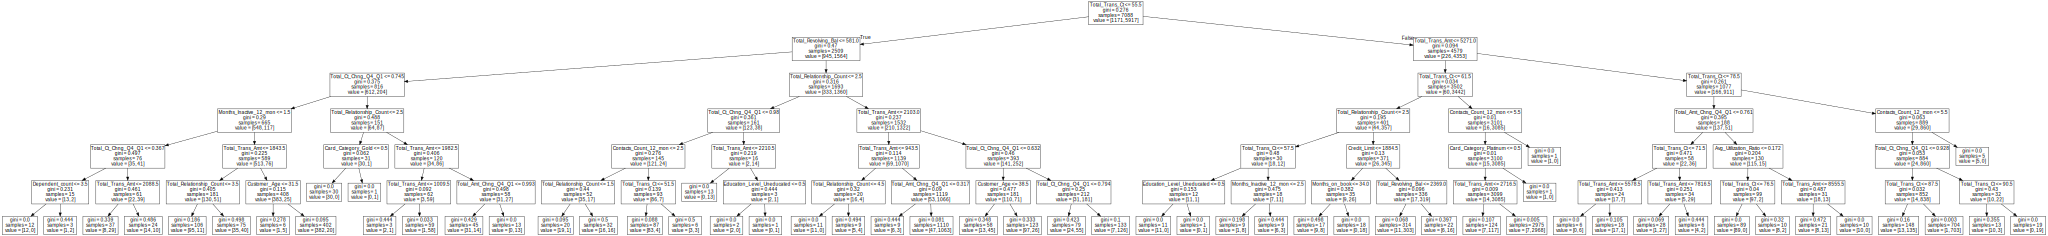

In [177]:
clf_dt = classificationtree(6)
treegraph(6)

<AxesSubplot: >

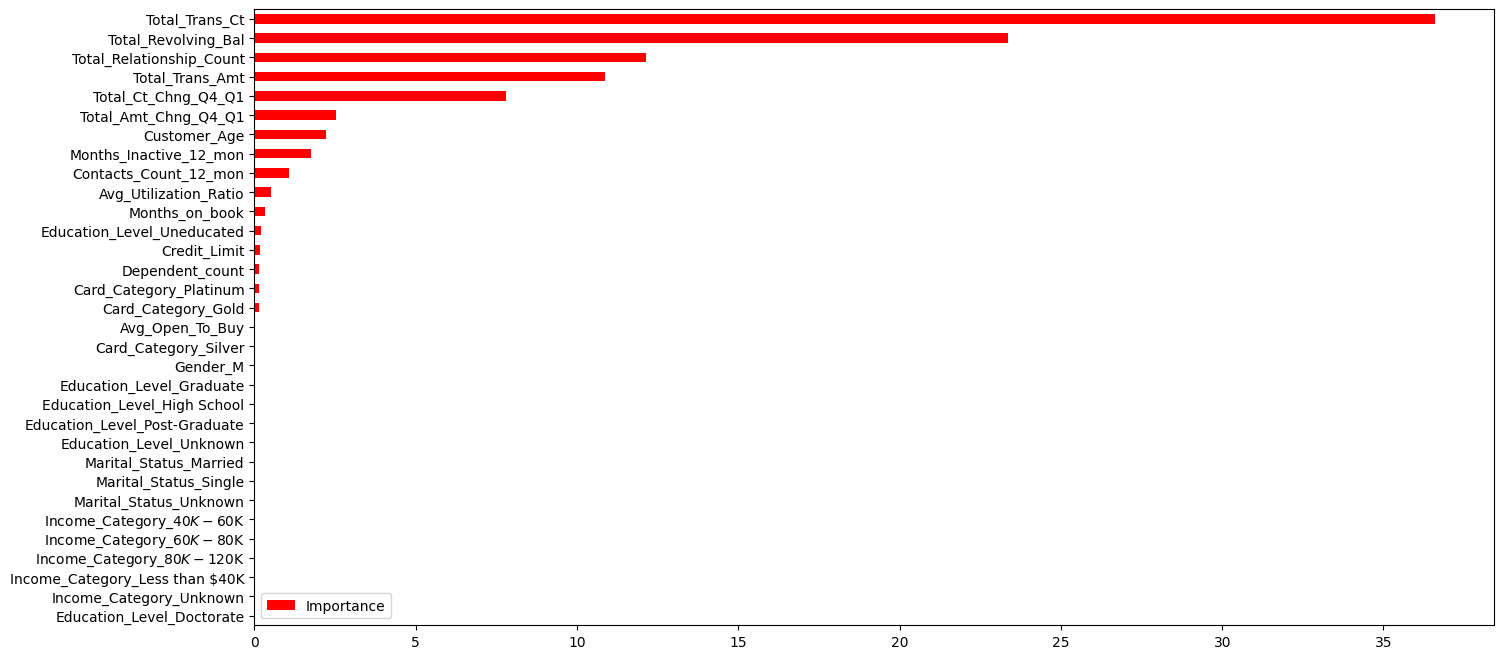

In [178]:
importanceplot()

## Random forest Classifier

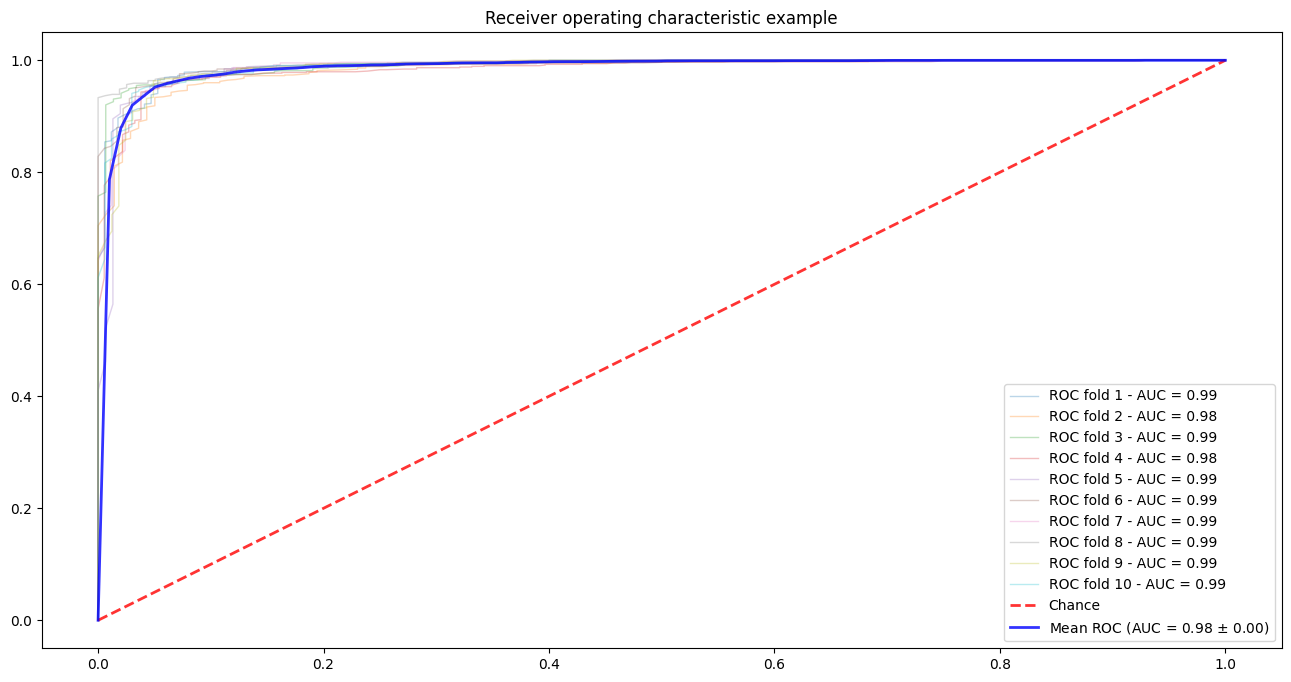

In [179]:
# KFold cross validation with 10 folds
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Random Forest Classifier
clf_rfc = RandomForestClassifier(n_estimators=200, random_state=seed)


tprs = []
aucs = []

mean_fpr = np.linspace(0,1,100)

fig, ax = plt.subplots()

for i, (train,test) in enumerate(kfold.split(X,y)):
    clf_rfc.fit(X.loc[train], y[train])
    y_proba = clf_rfc.predict_proba(X.loc[test]) 
    fpr, tpr, _ = roc_curve(y[test], y_proba[:,1])
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    
    tprs.append(interp_tpr)
    aucs.append(auc(fpr,tpr))
    
    ax.plot(
        fpr, tpr,
        label='ROC fold ' + str(i+1) +  ' - AUC = ' + str(np.round(auc(fpr,tpr),2)),
        lw=1,
        alpha=0.3)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean roc curve auc
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)

ax.legend(loc="lower right")
plt.show()


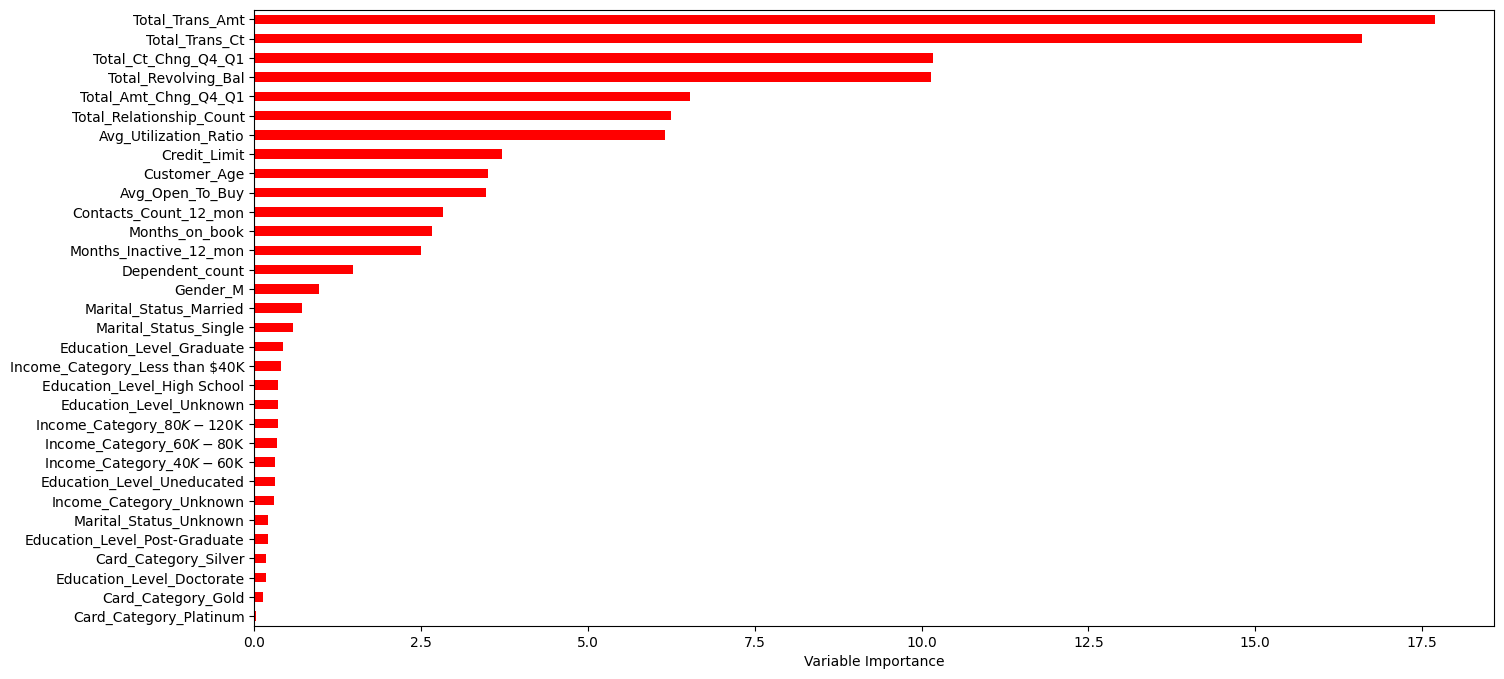

In [180]:
#Plot the feature importance attribute of the Random Forest Classifier
importance = pd.DataFrame({'Importance':clf_rfc.feature_importances_*100}, 
                          index = X.columns)

importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'red', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### XGBoost classifier

In [181]:
#XGBoost classifier fit
xgb_clf = XGBClassifier() 
xgb_clf.fit(X_train, y_train)

#Print Performance indicators
print("Performance indicators:")
y_pred = xgb_clf.predict(X_test)
print("Accuracy: {:.2f}%\n".format(accuracy_score(y_test, y_pred)*100))

#Print confusion matrix
print("Confusion matrix:\n")
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=['Predicted attrited customers', 'Preticted existing costumers'], columns=['Actual Attrited', 'Actual Existing '])
print(cm)

Performance indicators:
Accuracy: 97.30%

Confusion matrix:

                              Actual Attrited  Actual Existing 
Predicted attrited customers              401                27
Preticted existing costumers               55              2556


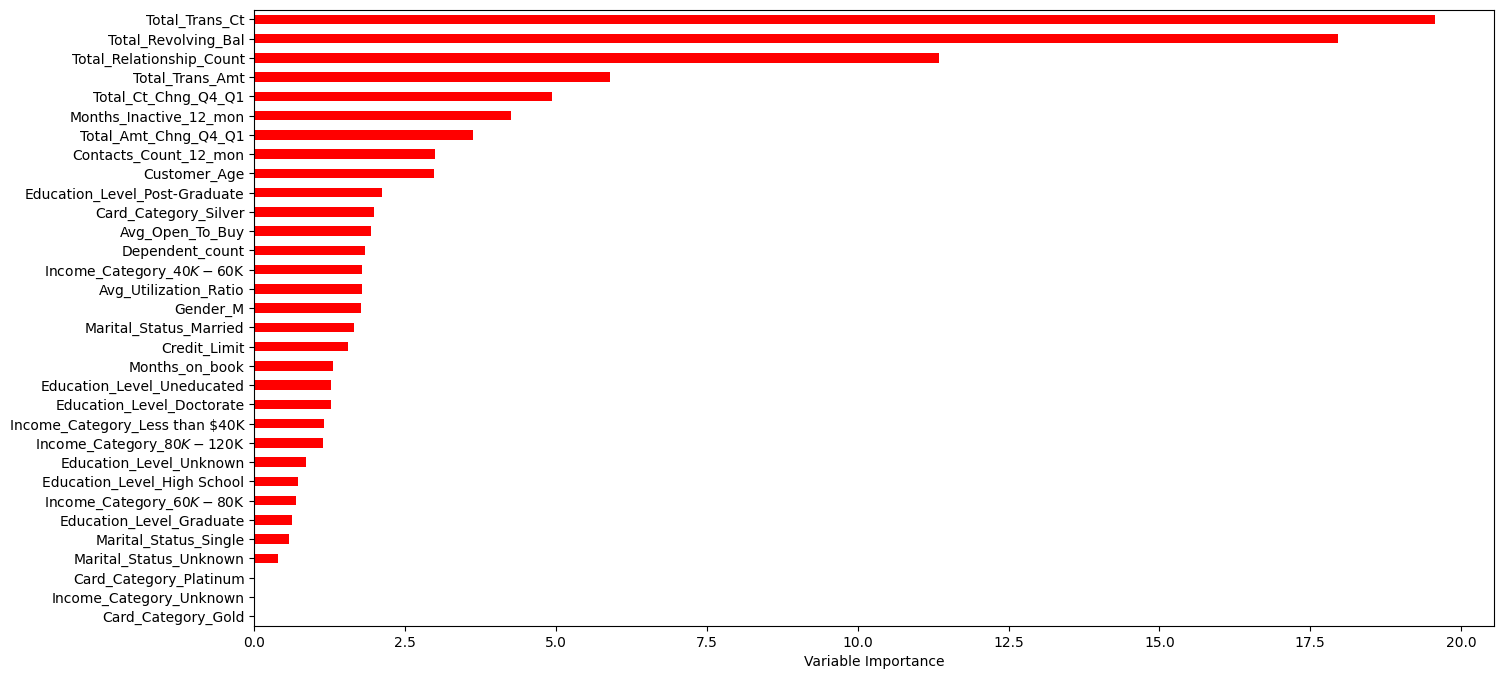

In [182]:
#Plot the feauture importance of XGBoost classifier fit
feature_importance = xgb_clf.feature_importances_*100

rel_imp = pd.Series(feature_importance, index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', 
               color = 'r', )

plt.xlabel('Variable Importance')

plt.gca().legend_ = None